In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib 

# Upload images

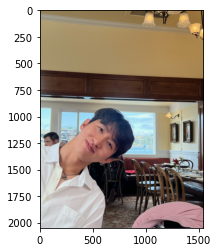

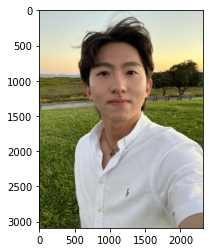

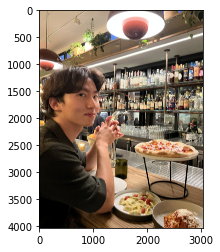

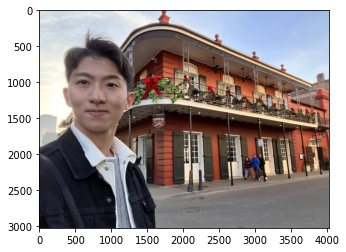

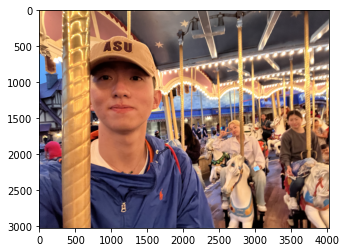

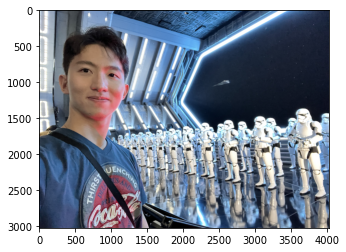

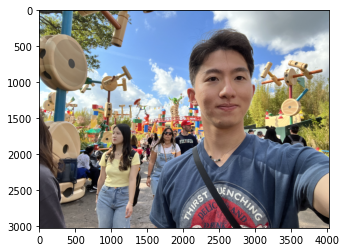

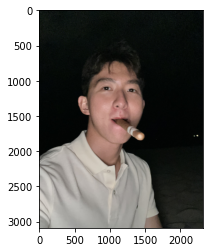

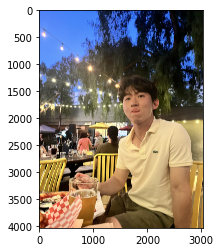

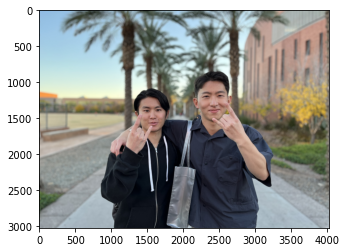

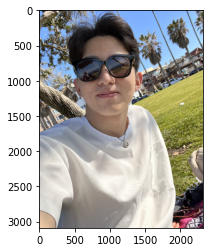

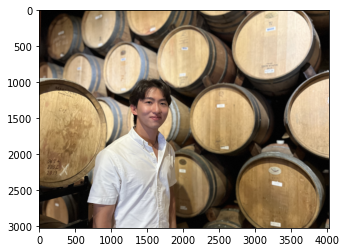

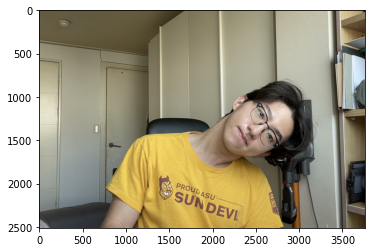

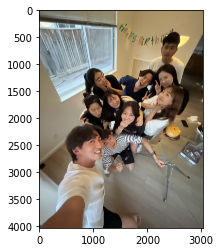

In [7]:
img_rgb_list = []
img_bgr_list = []

for i in range (1, 15):
    img_bgr = cv2.imread('camera_sticker/images/selfie'+str(i)+'.jpeg')
    img_bgr_list.append(img_bgr)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgb_list.append(img_rgb)
    
for img_rgb in img_rgb_list:
    plt.imshow(img_rgb)
    plt.show()

# Detect face

In [8]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = []

for img_rgb in img_rgb_list:
    dlib_rects.append(detector_hog(img_rgb, 1))

## Result of detection
The detector failed to detect two image files:  
one is the selfie in which I tilted my head, and the other is the selfie in which I wore sunglasses.  
Also the model can't detect the person wearing the hat.  
Let's remove them from the image list.  

In [9]:
import copy 
print(type(dlib_rects))

for dlib_rect_list in dlib_rects:
    print(dlib_rect_list)
    
remove_index = []
for i, dlib_rect_list in enumerate(dlib_rects):
    if len(dlib_rect_list) == 0:
        remove_index.append(i)
        
img_bgr_list = [img for i, img in enumerate(img_bgr_list) if i not in remove_index]
dlib_rects = [rect_list for i, rect_list in enumerate(dlib_rects) if i not in remove_index]

img_bgr_test_list = copy.deepcopy(img_bgr_list)

print(id(img_bgr_list[0]), id(img_bgr_test_list[0]))

<class 'list'>
rectangles[]
rectangles[[(691, 692) (1490, 1491)]]
rectangles[[(514, 1313) (1313, 2112)]]
rectangles[[(425, 781) (1224, 1579)]]
rectangles[[(3486, 1474) (3641, 1629)], [(2643, 1595) (2798, 1750)], [(3079, 1449) (3142, 1511)]]
rectangles[[(425, 603) (1224, 1402)]]
rectangles[[(2200, 692) (2999, 1491)], [(964, 1646) (1150, 1832)], [(1730, 1673) (1859, 1802)]]
rectangles[[(723, 830) (1682, 1789)]]
rectangles[[(1466, 1466) (2020, 2021)]]
rectangles[[(1402, 1274) (1787, 1660)], [(2197, 1067) (2659, 1530)]]
rectangles[]
rectangles[[(1375, 1119) (1837, 1581)]]
rectangles[]
rectangles[[(1508, 1865) (1776, 2133)], [(1281, 1604) (1504, 1827)], [(959, 1777) (1182, 2000)], [(2198, 1207) (2421, 1430)], [(2162, 1479) (2429, 1746)]]
140098647614448 140099014754544


691 692 1490 1491


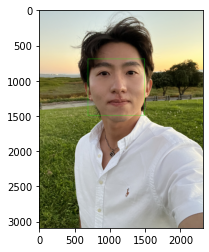

514 1313 1313 2112


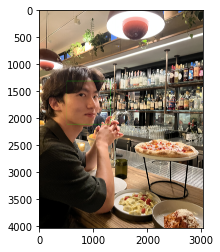

425 781 1224 1579


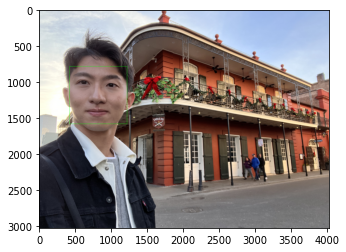

3486 1474 3641 1629
2643 1595 2798 1750
3079 1449 3142 1511


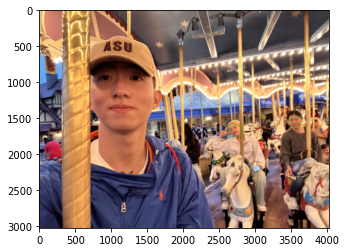

425 603 1224 1402


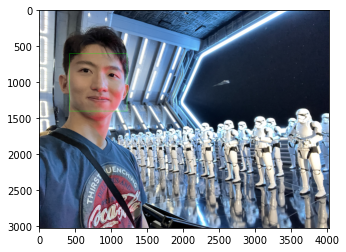

2200 692 2999 1491
964 1646 1150 1832
1730 1673 1859 1802


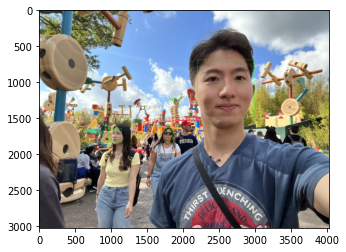

723 830 1682 1789


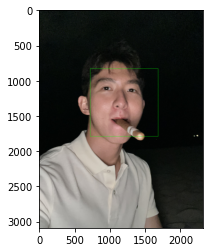

1466 1466 2020 2021


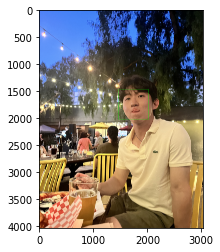

1402 1274 1787 1660
2197 1067 2659 1530


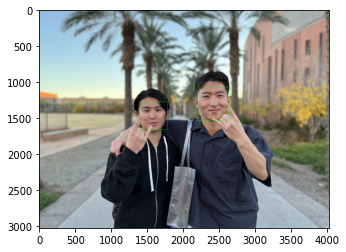

1375 1119 1837 1581


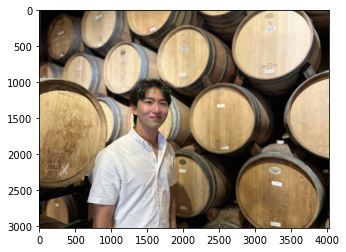

1508 1865 1776 2133
1281 1604 1504 1827
959 1777 1182 2000
2198 1207 2421 1430
2162 1479 2429 1746


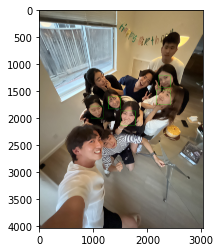

In [10]:
for i, dlib_rect_list in enumerate(dlib_rects):
    for dlib_rect in dlib_rect_list:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        print(l, t, r, b)
        cv2.rectangle(img_bgr_test_list[i], (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
        
    plt.imshow(cv2.cvtColor(img_bgr_test_list[i], cv2.COLOR_BGR2RGB))
    plt.show()

In [11]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for i, dlib_rect_list in enumerate(dlib_rects):
    for dlib_rect in dlib_rect_list:
        points = landmark_predictor(img_bgr_test_list[i], dlib_rect)
        list_points = list(map(lambda p : (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

In [13]:
print(len(list_landmarks))

for i, land_mark in enumerate(list_landmarks):
    print(i, land_mark)
    print(len(land_mark))

print(list_landmarks[14])

20
0 [(699, 953), (706, 1061), (723, 1169), (743, 1274), (785, 1374), (853, 1458), (941, 1519), (1039, 1563), (1144, 1575), (1244, 1556), (1327, 1507), (1402, 1444), (1461, 1361), (1499, 1258), (1515, 1148), (1522, 1037), (1523, 927), (768, 828), (820, 766), (902, 742), (987, 755), (1062, 788), (1159, 779), (1235, 744), (1316, 731), (1392, 749), (1444, 804), (1117, 881), (1120, 954), (1125, 1025), (1130, 1101), (1036, 1169), (1081, 1180), (1127, 1188), (1171, 1176), (1214, 1163), (853, 909), (896, 880), (949, 879), (994, 914), (949, 922), (895, 923), (1229, 909), (1275, 871), (1327, 869), (1369, 895), (1330, 911), (1278, 913), (974, 1314), (1033, 1279), (1089, 1262), (1130, 1272), (1174, 1258), (1230, 1271), (1284, 1297), (1233, 1330), (1181, 1351), (1135, 1359), (1091, 1356), (1036, 1343), (994, 1311), (1090, 1306), (1131, 1310), (1176, 1301), (1264, 1296), (1177, 1302), (1132, 1311), (1090, 1308)]
68
1 [(415, 1578), (420, 1686), (429, 1794), (449, 1903), (503, 1997), (594, 2070), (70

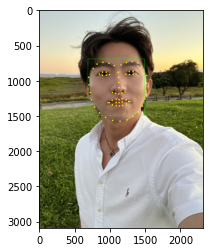

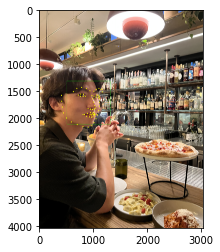

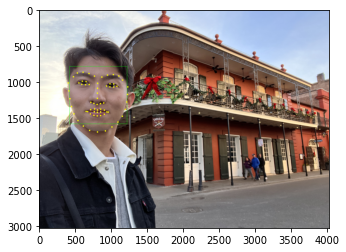

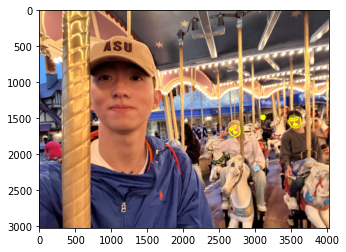

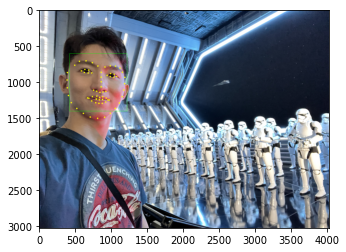

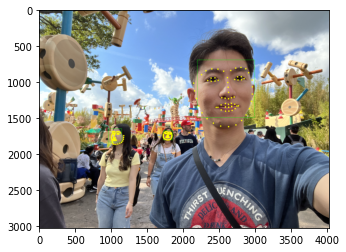

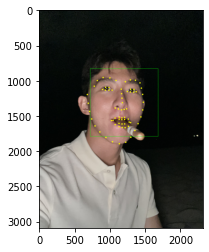

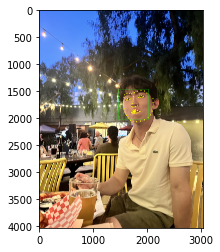

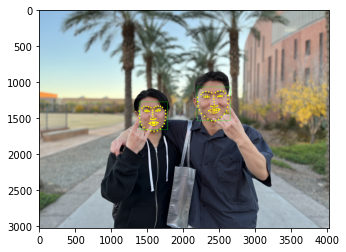

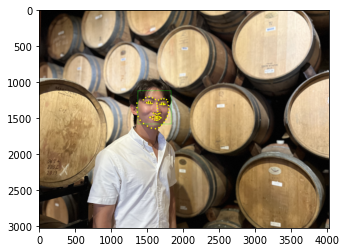

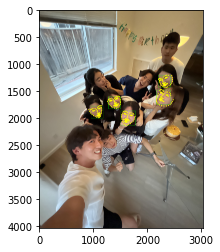

In [14]:
index = 0

for i, dlib_rect_list in enumerate(dlib_rects):
    for dlib_rect in dlib_rect_list:
        for point in list_landmarks[index]:
            cv2.circle(img_bgr_test_list[i], point, 10, (0,255,255), -1)
        index += 1
        
for img in img_bgr_test_list:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
    plt.show()

(512, 512, 3)
<class 'numpy.ndarray'>


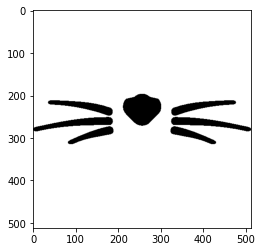

In [15]:
sticker_path = 'camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
print (img_sticker.shape)
print (type(img_sticker))
plt.imshow(img_sticker)
plt.show()

In [16]:
img_sticker_list = []
nose_location_list = []

index = 0 
#resize sticker size per rectangle
#save nose lacation
for dlib_rect_list in dlib_rects:
    for dlib_rect in dlib_rect_list:
        x = list_landmarks[index][30][0]
        y = list_landmarks[index][30][1]
        print(f'(x, y): ({x},{y})')
        nose_location_list.append([x,y])
        w = dlib_rect.width()
        print(f'(w): ({w})')
        img_sticker = cv2.imread(sticker_path)
        img_sticker_list.append(cv2.resize(img_sticker, (w,w)))
        index += 1

(x, y): (1130,1101)
(w): (800)
(x, y): (1028,1767)
(w): (800)
(x, y): (812,1225)
(w): (800)
(x, y): (3554,1569)
(w): (156)
(x, y): (2707,1679)
(w): (156)
(x, y): (3113,1488)
(w): (64)
(x, y): (865,1065)
(w): (800)
(x, y): (2635,1142)
(w): (800)
(x, y): (1041,1753)
(w): (187)
(x, y): (1792,1724)
(w): (130)
(x, y): (1177,1313)
(w): (960)
(x, y): (1729,1726)
(w): (555)
(x, y): (1584,1486)
(w): (386)
(x, y): (2438,1314)
(w): (463)
(x, y): (1650,1405)
(w): (463)
(x, y): (1620,2011)
(w): (269)
(x, y): (1402,1718)
(w): (224)
(x, y): (1093,1909)
(w): (224)
(x, y): (2287,1342)
(w): (224)
(x, y): (2263,1594)
(w): (268)


In [17]:
temp_img_list = []
img_index = 0
rect_index = 0
for dlib_rect_list in dlib_rects:
    img = img_bgr_test_list[img_index].copy()
    for dlib_rect in dlib_rect_list:
        width = img_sticker_list[rect_index].shape[0]
        x = nose_location_list[rect_index][0] - width//2
        y = nose_location_list[rect_index][1] - width//2
        sticker_area = img[y:y+width, x:x+width]
        img[y:y+width, x:x+width] = \
            np.where(img_sticker_list[rect_index]==255, sticker_area, img_sticker_list[rect_index]).astype(np.uint8)
        rect_index += 1
    temp_img_list.append(img)
    img_index += 1

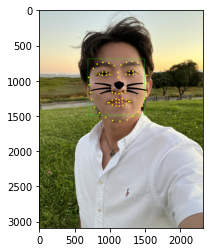

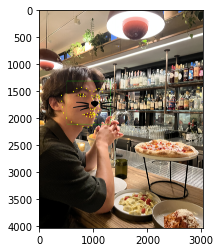

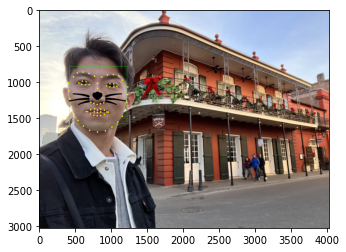

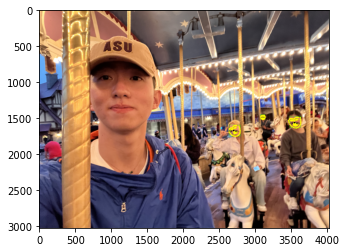

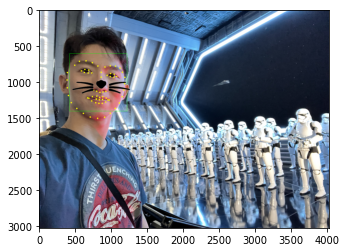

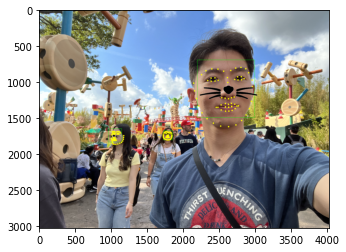

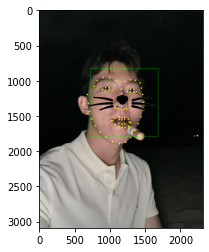

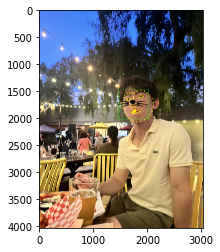

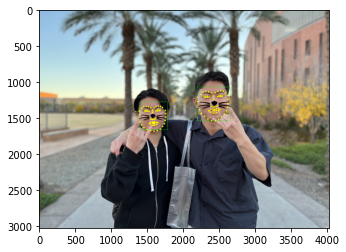

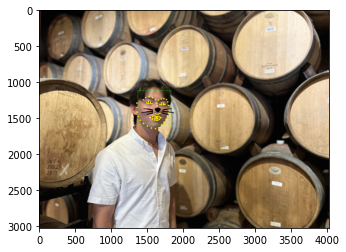

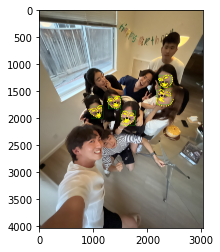

In [18]:
for img in temp_img_list:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
    plt.show()

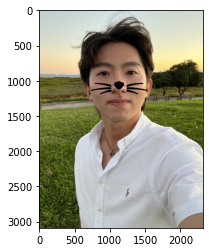

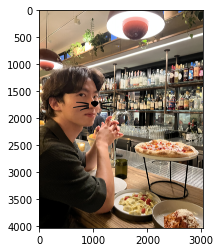

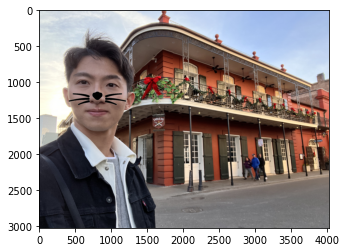

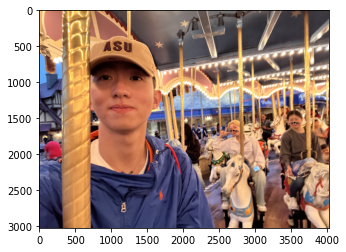

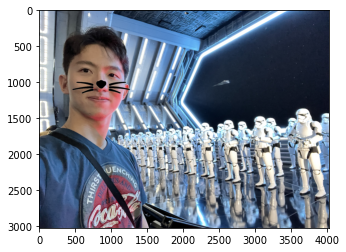

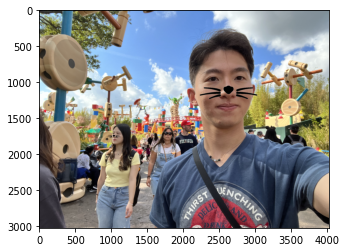

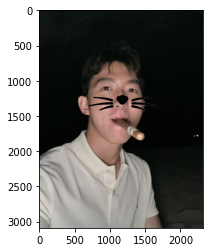

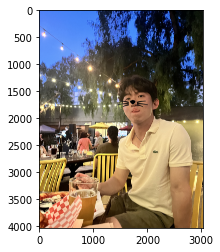

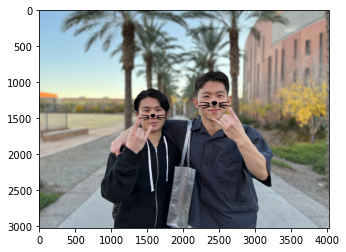

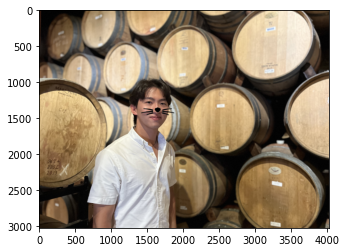

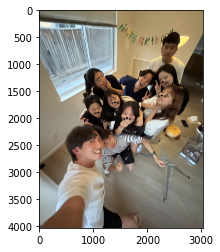

In [19]:
img_index = 0
rect_index = 0
for dlib_rect_list in dlib_rects:
    img = img_bgr_list[img_index]
    for dlib_rect in dlib_rect_list:
        width = img_sticker_list[rect_index].shape[0]
        x = nose_location_list[rect_index][0] - width//2
        y = nose_location_list[rect_index][1] - width//2
        sticker_area = img[y:y+width, x:x+width]
        img[y:y+width, x:x+width] = \
            np.where(img_sticker_list[rect_index]==255, sticker_area, img_sticker_list[rect_index]).astype(np.uint8)
        rect_index += 1
    img_index += 1

for img in img_bgr_list:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
    plt.show()

# Retrospective of the quest
Through the quest, I found the model can not detect **the tilted face**, **the face with obscured eyebrows** such as the face wearing sunglasses, and **the face showing only one side**.  

After select the image that model detected faces, the sticker should be readjusted according to the tilted face angle. For example, in the eighth photo, my face is tilted slightly. However, the sticker is not tilted to match the angle of the face. To apply the sticker more naturally, I should calculate the angle of face and readjust the sticker's angle.  
If you execute the below code, 
``` python
    detector_hog = dlib.get_frontal_face_detector()
```
the processing speed depends on the number of images and faces. The more images are given, the longer it will take. If you are going to make real time applying sticker application, detecting the face is the main point you should consider. The speed of detecting faces and applying stickers directly impacts the user experience the most.  

The other one related to user experience is the accuracy of detection. You can see the model detect the 3 faces on the fourth image eventhough it failed to detect my face wearing the ASU hat. Upon closer examination, one of the three detections detected a face that wasn't even visible. The result was different from what I had expected when I provided the photos. This kind of experience is a critical issue for user experience.  